# Task1:使用 scikit-image 完成全域及局部直方圖等化

##  實習步驟:

### Step1. 匯入需要用到的 skimage 套件及其他套件
### Step2. 使用 rcParams 控制 matplotlib 中屬性的預設值：圖形大小，dpi，線寬，顏色和樣式，軸和網格屬性，文字和字型屬性等，這裡設定字形為 11 大小
### Step3. 使用 img_as_ubyte 將使用的圖片 data.moon()做型態轉換，並同時將data.moon()存做 img

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

matplotlib.rcParams['font.size'] = 11

img = img_as_ubyte(data.moon())                                                 # load example image

### Step4. 設定全域直方圖及區域直方圖

In [2]:
# Global equalize
img_rescale = exposure.equalize_hist(img)                                       # 繪製全域直方圖(線性CDF)

In [3]:
# Equalization
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)                                # 繪製局部直方圖(更線性CDF)

### Step5. 定義繪圖 function:
1. 將 axes 之值分別存入 ax_img, ax_hist 中
2. 在同張圖中繪圖，用 twinx()使其中共同的 x 軸具有不同的 y 軸
3. 顯示圖片
4. 顯示直方圖
5. 算出累計分布圖

In [4]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an  image along with its histogram and cumulative histogram."""
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()                                                    #在同張圖中繪圖，用twinx()使其中共同的 x 軸具有不同的 y 軸

    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()                                                       # 關閉子圖中的軸

    ax_hist.hist(image.ravel(), bins=bins)                                      # 將多維度降成一維
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))    # 設定Y軸克度
    ax_hist.set_xlabel('Pixel intensity')                                       # 設定X軸 label

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)                                                # 置x軸視圖限製最小xmin 最大xmax

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)               # 算出累積分度
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf

### Step6. 顯示結果


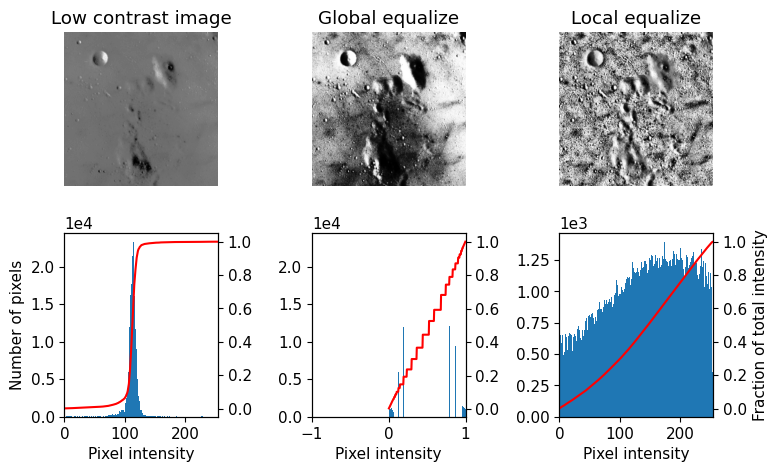

In [5]:
# Display results
fig = plt.figure(figsize=(8, 5))                                                # 限制圖片大小
axes = np.zeros((2, 3), dtype=object)                                           # 建立 axes 為 2*3 的零矩陣
axes[0, 0] = plt.subplot(2, 3, 1)                                               # 在繪製子圖 axes[0, 0] 的位置為2*3的第一個圖
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])         # 在繪製子圖 axes[0, 1] 的位置為2*3的第二個圖
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])         # 在繪製子圖 axes[0, 2] 的位置為2*3的第三個圖
axes[1, 0] = plt.subplot(2, 3, 4)                                               # 在繪製子圖 axes[1, 0] 的位置為2*3的第四個圖
axes[1, 1] = plt.subplot(2, 3, 5)                                               # 在繪製子圖 axes[1, 1] 的位置為2*3的第五個圖
axes[1, 2] = plt.subplot(2, 3, 6)                                               # 在繪製子圖 axes[1, 2] 的位置為2*3的第六個圖

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])                    # 劃出左邊第一排的圖
ax_img.set_title('Low contrast image') 
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])            # 劃出左邊第二排的圖
ax_img.set_title('Global equalize')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])                 # 劃出左邊第三排的圖
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')

# prevent overlap of y-axis labels
fig.tight_layout()


### step7. 使用 hack.md 繪製流程圖
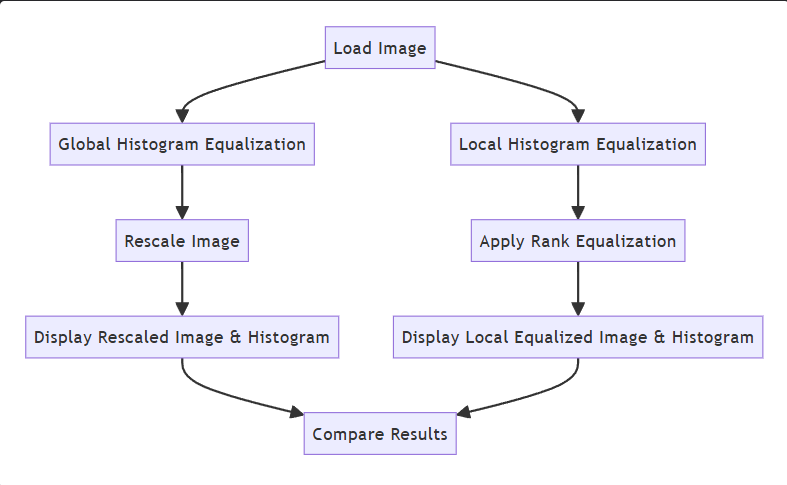

## 實驗結果
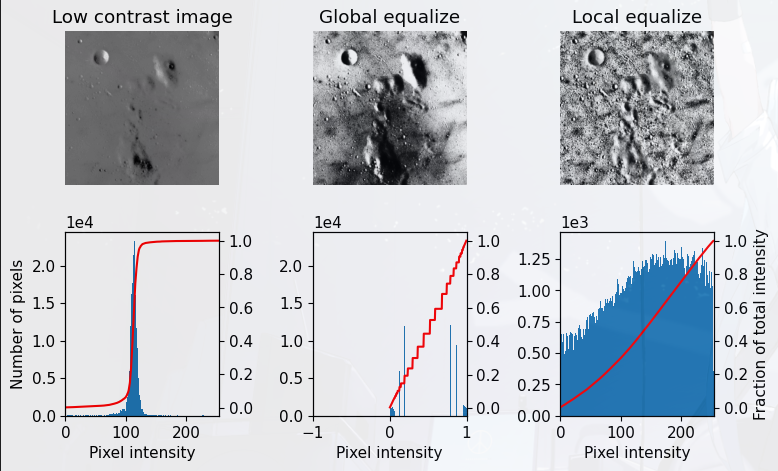

# Task2:修改局部直方圖等化的參數最佳化
* 實習步驟（同上）
* 修改描述：將 Equalization 中的 disk( )參數方別改為 disk(345)並比較發覺在 disk(345)時 local equalize 的顯示較明顯，且和 global equalize 較像

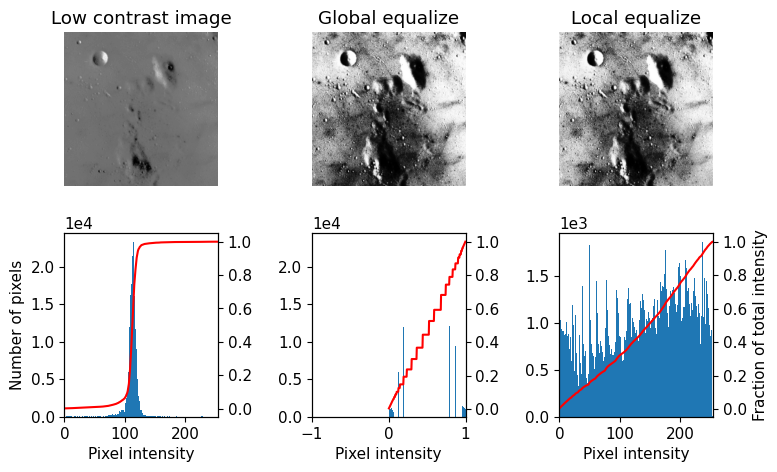

In [6]:
matplotlib.rcParams['font.size'] = 11

# Load an example image
img = img_as_ubyte(data.moon())

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
footprint = disk(345)                                                       # 修改找最佳值
img_eq = rank.equalize(img, footprint = footprint)

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalize')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')

# prevent overlap of y-axis labels
fig.tight_layout()

## 實驗結果
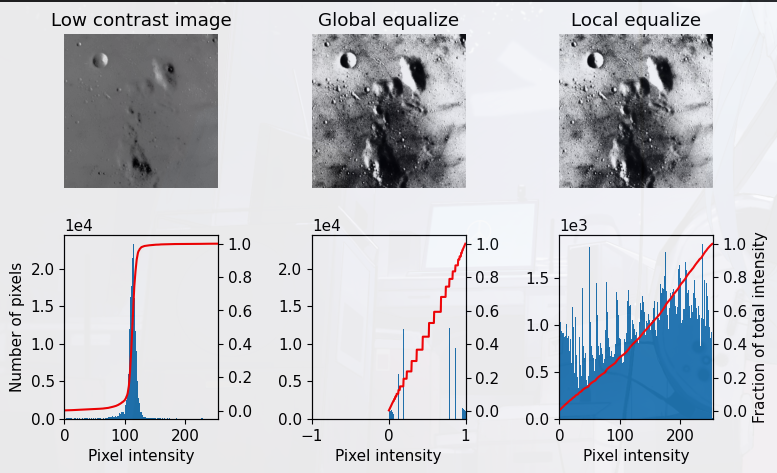

# Task3: 不使用scikit-image完成全域直方圖等化
* 實習步驟:<br><br>
Step1. 匯入需要用到的套件及讀取檔案<br>
Step2. 將圖轉成灰階並顯示<br>
Step3. 繪製原圖直方圖<br>
Step4. 使原圖均衡化<br>
Step5. 繪製圖經均衡化後的直方圖<br>

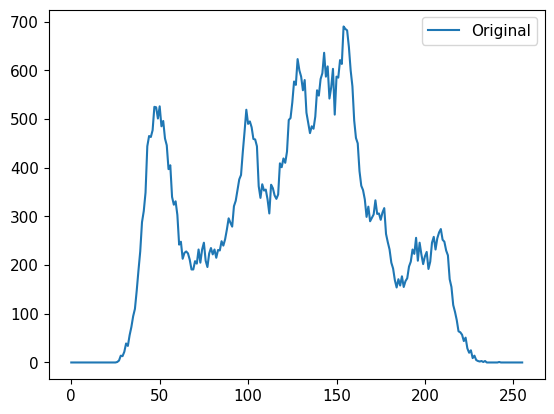

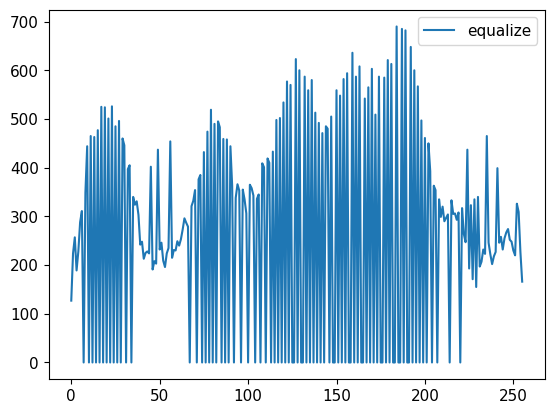

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("./source/Pictrue.png")                               # 讀圖片
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)                            # 將圖片轉換為灰度圖
cv.imshow("gray", gray)                                                 # 顯示原圖

# 直方圖繪製
hist = cv.calcHist([gray], [0], None, [256], [0, 256])                  # 計算原直方圖的數值
plt.plot(hist, label='Original')                                        # 印出原圖片直方圖
plt.legend()
plt.show()

# 應用直方圖均衡化
dst = cv.equalizeHist(gray)                                             # 畫出經全域直方圖處理過後的照片
cv.imshow("dst", dst)

# 直方圖繪製
hist = cv.calcHist([dst], [0], None, [256], [0, 256])                   # 印出經直方圖均衡化後的照片的直方圖
plt.plot(hist, label="equalize")
plt.legend()
plt.show()

cv.waitKey(0)                                                           # 等待隨意按鍵結束瀏覽
cv.destroyAllWindows()                                                  # 將小視窗關掉


### step6. 使用 hack.md 繪製流程圖
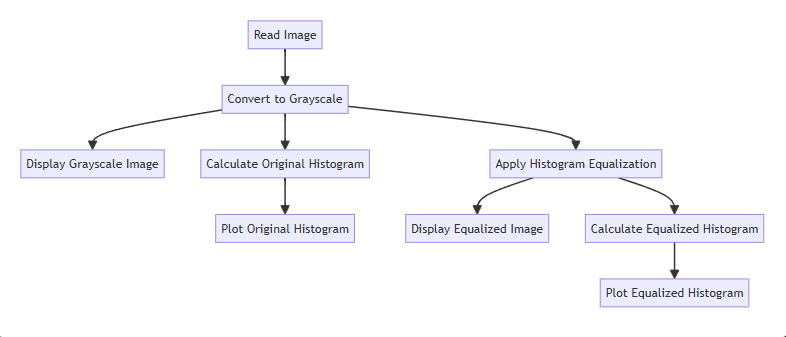

## 實驗結果
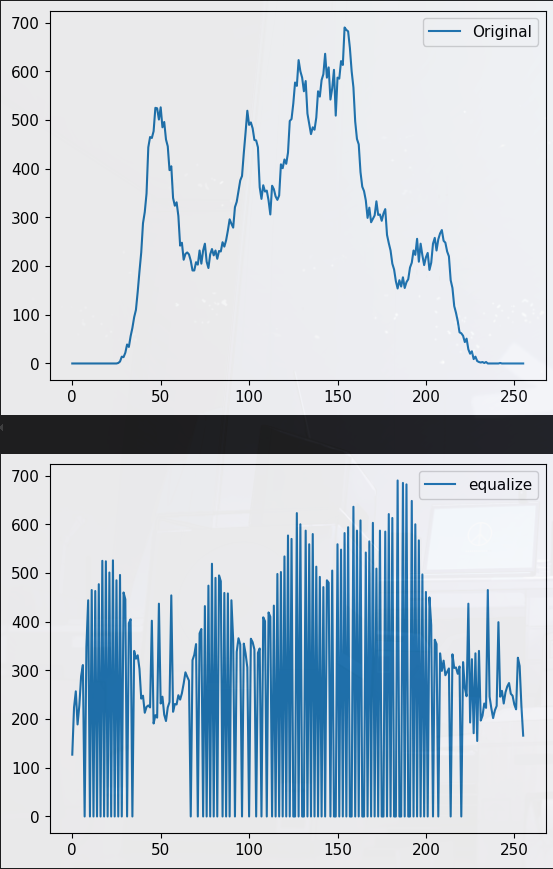

## 心得:
&emsp;&emsp;經過此次的實驗，本人更了解何謂最佳化，雖然說這是一個相當主觀的結果，但我更應該了解的是其中怎麼樣的過程會帶來怎麼樣的結果。起碼我現在知道圖片看起來可能不是這麼好看的理由，可能並不是完全的主觀，而是真的少了點顏色之類的，可以使用直方圖來觀察而不是一味的單靠肉眼自由心證。